In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from datetime import datetime
import collections
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 데이터 로드하기

In [ ]:
mbsa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/text2.csv')
mbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20400 non-null  int64 
 1   Date        20400 non-null  object
 2   text        20400 non-null  object
 3   Sentiment   20400 non-null  int64 
 4   text2       18655 non-null  object
dtypes: int64(2), object(3)
memory usage: 797.0+ KB


In [ ]:
mbsa = mbsa[mbsa['text2'].notnull()]
mbsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18655 entries, 0 to 20399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18655 non-null  int64 
 1   Date        18655 non-null  object
 2   text        18655 non-null  object
 3   Sentiment   18655 non-null  int64 
 4   text2       18655 non-null  object
dtypes: int64(2), object(3)
memory usage: 874.5+ KB


In [ ]:
mbsa['Sentiment'].value_counts()

2    9245
0    9010
1     400
Name: Sentiment, dtype: int64

## train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = \
  train_test_split(mbsa['text2'], mbsa['Sentiment'],
                  test_size = 0.2,
                  random_state = 777,
                  stratify = mbsa['Sentiment'])

In [ ]:
x_train_all

4895     Also brother In law wa saying scam also said c...
20195      New Cloud Mining USD Dogecoin Ghs StartUp Bonus
17605                                                  BTC
14313    HOLY BITCOIN BROTHER We ready tomorrow Ladies ...
8655                                             Gem Forex
                               ...                        
15513                  Users still believe free crypto omg
19120                              Price Update BTC source
607      From Bitcoin To Hedera Hashgraph Documentary H...
9875     dont introduce single click btc conversion alt...
14658       All need ETH stay green line BTC take ATH USDk
Name: text2, Length: 14924, dtype: object

## 토큰화

In [ ]:
X_train = [sentence.split(' ') for sentence in x_train_all]
X_train[:3]

[['Also',
  'brother',
  'In',
  'law',
  'wa',
  'saying',
  'scam',
  'also',
  'said',
  'company',
  'accepting',
  'BTC',
  'ETH'],
 ['New', 'Cloud', 'Mining', 'USD', 'Dogecoin', 'Ghs', 'StartUp', 'Bonus'],
 ['BTC']]

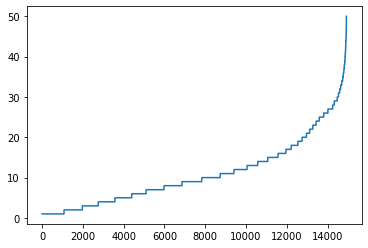

In [ ]:
sentence_len = [len(sentence) for sentence in X_train]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

In [ ]:
sentences_new = []

for sentence in X_train:
    sentences_new.append([word for word in sentence][:50])

X_train = sentences_new

for i in range(5):
    print(X_train[i])

['Also', 'brother', 'In', 'law', 'wa', 'saying', 'scam', 'also', 'said', 'company', 'accepting', 'BTC', 'ETH']
['New', 'Cloud', 'Mining', 'USD', 'Dogecoin', 'Ghs', 'StartUp', 'Bonus']
['BTC']
['HOLY', 'BITCOIN', 'BROTHER', 'We', 'ready', 'tomorrow', 'Ladies', 'Gents', 'MOOONZOO', 'IS', 'OUR', 'DESTINATION', 'XALL', 'XALL']
['Gem', 'Forex']


In [ ]:
max(sentence_len)

50

In [ ]:
X_test = [sentence.split(' ') for sentence in x_test]
sentences_new = []

for sentence in X_test:
    sentences_new.append([word for word in sentence][:50])

X_test = sentences_new
X_test[:3]

[['Roger',
  'Ver',
  'launch',
  'Local',
  'Bitcoin',
  'dont',
  'dare',
  'confuse',
  'LocalBitcoins'],
 ['XEM', 'BTC', 'BitMEX', 'bitFlyer'],
 ['Technology',
  'Bitcoin',
  'Jumps',
  'Toward',
  'BestPerforming',
  'Month',
  'Since']]

## 정수 인코딩

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

print(tokenizer.word_index)

{'btc': 1, 'bitcoin': 2, 'usd': 3, 'price': 4, 'i': 5, 'eth': 6, 'xrp': 7, 'crypto': 8, 'the': 9, 'de': 10, 'new': 11, 'ltc': 12, 'market': 13, 'free': 14, 'bch': 15, 'trading': 16, 'buy': 17, 'money': 18, 'time': 19, 'get': 20, 'k': 21, 'may': 22, 'via': 23, 'coin': 24, 'like': 25, 'one': 26, 'day': 27, 'h': 28, 'xlm': 29, 'volume': 30, 'even': 31, 'x': 32, 'exchange': 33, 'is': 34, 'trx': 35, 'en': 36, 'eos': 37, 'you': 38, 'cash': 39, 'still': 40, 'this': 41, 'current': 42, 'neo': 43, 'mining': 44, 'earn': 45, 'wa': 46, 'primexbt': 47, 'dont': 48, 'blockchain': 49, 'value': 50, 'in': 51, 'ada': 52, 'ethereum': 53, 'last': 54, 'good': 55, 'etf': 56, 'and': 57, 'binance': 58, 'trade': 59, 'link': 60, 'change': 61, 'bnb': 62, 'el': 63, 'join': 64, 'cryptocurrency': 65, 'know': 66, 'news': 67, 'use': 68, 'make': 69, 'high': 70, 'la': 71, 'year': 72, 'long': 73, 'worth': 74, 'people': 75, 'going': 76, 'leverage': 77, 'rally': 78, 'great': 79, 'max': 80, 'xmr': 81, 'top': 82, 'see': 83, '

In [ ]:
threshold = 1
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 : ', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율 : ', (rare_cnt / total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ', (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 :  17665
등장 빈도가 0번 이하인 희귀 단어의 수 : 0
단어 집합에서 희귀 단어의 비율 :  0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  0.0


In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 : ', vocab_size)

단어 집합의 크기 :  17666


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# train_X = pad_sequences(train_X, padding = 'post')
print(X_train[:3])

[[135, 2245, 51, 2246, 46, 914, 139, 135, 361, 514, 1934, 1, 6], [11, 235, 44, 3, 296, 309, 329, 223], [1]]


In [ ]:
y_train = np.array(y_train_all)
y_test = np.array(y_test)

In [ ]:
word_index = tokenizer.word_index

import json 
json = json.dumps(word_index)
f3 = open('/content/drive/MyDrive/Colab Notebooks/3rd project/engIndex.json', 'w')
f3.write(json)
f3.close()

## 빈 샘플(empty samples) 제거

In [ ]:
drop_train =[index for index, sentence in enumerate(X_train) \
             if len(sentence) < 1]

In [ ]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

14924
14924


## 패딩

리뷰의 최대 길이 :  50
리뷰의 평균 길이 :  10.873090324309837


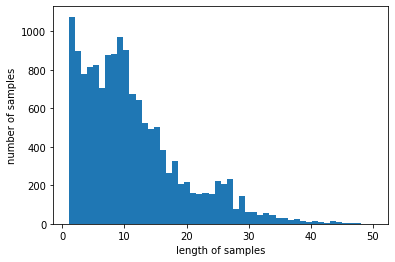

In [ ]:
print('리뷰의 최대 길이 : ', max(len(l) for l in X_train))
print('리뷰의 평균 길이 : ', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s'%(max_len, (count / len(nested_list)*100)))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율 : 97.38005896542482


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/X_test.npy', X_test)
np.save('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/y_test.npy', y_test)

## ndarray 불러오기

In [ ]:
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/3rd project/data/eng/y_test.npy')

In [ ]:
y_train

array([2, 1, 0, ..., 2, 2, 0])

In [ ]:
X_train

array([[   0,    0,    0, ..., 1934,    1,    6],
       [   0,    0,    0, ...,  309,  329,  223],
       [   0,    0,    0, ...,    0,    0,    1],
       ...,
       [   0,    0,    0, ...,  423,   55, 1597],
       [   0,    0,    0, ...,    4,    1,   50],
       [   0,    0,    0, ...,  181,  683, 8124]], dtype=int32)

## LSTM 분류

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(3, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/3rd project/history/history10.h5',
                     monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc],
                    batch_size=64, validation_split=0.2)

Epoch 1/15
187/187 [==============================] - ETA: 0s - loss: 0.7284 - acc: 0.5880
Epoch 00001: val_acc improved from -inf to 0.63819, saving model to /content/drive/MyDrive/Colab Notebooks/3rd project/history/history10.h5
187/187 [==============================] - 21s 97ms/step - loss: 0.7284 - acc: 0.5880 - val_loss: 0.6497 - val_acc: 0.6382
Epoch 2/15
187/187 [==============================] - ETA: 0s - loss: 0.5582 - acc: 0.7204
Epoch 00002: val_acc improved from 0.63819 to 0.64523, saving model to /content/drive/MyDrive/Colab Notebooks/3rd project/history/history10.h5
187/187 [==============================] - 17s 93ms/step - loss: 0.5582 - acc: 0.7204 - val_loss: 0.6352 - val_acc: 0.6452
Epoch 3/15
187/187 [==============================] - ETA: 0s - loss: 0.4749 - acc: 0.7746
Epoch 00003: val_acc improved from 0.64523 to 0.66131, saving model to /content/drive/MyDrive/Colab Notebooks/3rd project/history/history10.h5
187/187 [==============================] - 18s 94ms/ste

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/3rd project/history/history10.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(X_test, y_test)[1]))

117/117 [==============================] - 2s 15ms/step - loss: 0.6950 - acc: 0.6802

 테스트 정확도 : 0.6802


## 리뷰 예측

In [ ]:
predictions = loaded_model.predict(X_test)

In [ ]:
predictions

array([[4.9612355e-01, 2.4204047e-02, 4.7967243e-01],
       [9.6357971e-01, 1.9431347e-04, 3.6225922e-02],
       [9.9959284e-01, 1.8087759e-04, 2.2628444e-04],
       ...,
       [8.5015081e-02, 4.1185450e-04, 9.1457307e-01],
       [6.6494040e-02, 2.0374920e-05, 9.3348563e-01],
       [3.1545484e-01, 8.0264278e-04, 6.8374252e-01]], dtype=float32)

In [ ]:
predict = pd.DataFrame(predictions)
predict

,0,1,2
0,0.496124,0.024204,0.479672
1,0.963580,0.000194,0.036226
2,0.999593,0.000181,0.000226
3,0.501080,0.033301,0.465618
4,0.727823,0.000436,0.271740
...,...,...,...
3726,0.109670,0.001522,0.888809
3727,0.288468,0.003931,0.707601
3728,0.085015,0.000412,0.914573
3729,0.066494,0.000020,0.933486


In [ ]:
predict['s'] = 0
for i in range(3731):
    predict['s'][i] = predict.iloc[i].idxmax()
predict['s'].value_counts()

2    2085
0    1566
1      80
Name: s, dtype: int64